# Compile All qPCR Data 

## Meeghan Pither-Joyce, John McCallum
## May 2016

- Location of workbooks:
    - qPCR data https://iplant.plantandfood.co.nz/project/I130806/Research/GEP_qPCR_results.xlsx
    - sample data https://iplant.plantandfood.co.nz/project/I130806/Research/ResultswheatGEP.xlsx
- first need to set access credentials via system 
- this is basically updated version of https://iplant.plantandfood.co.nz/project/I130806/Research/2015-11-23_Clean_384-well_qPCR_Data.docx

In [1]:
library(iplantAcquiR)
handle <- iplant_handle(username = Sys.getenv("USER"),
                        password = Sys.getenv("IPLANT_PASSWORD"))
handle <- iplant_authenticate(handle)

Submitting with 'NULL'


In [2]:
library(openxlsx)
library(data.table)
library(dplyr)
library(ggplot2)
library(readr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Read Samples from Hamishes Sheet

In [3]:
sample_filename <- iplant_acquire(handle = handle,
                           url = "https://iplant.plantandfood.co.nz/project/I130806/Research/ResultswheatGEP.xlsx")
(sheetnames <- getSheetNames(sample_filename))

[1] "Leaf lengths"            "PN vs HS"               
 [3] "HaunStage"               "FLN"                    
 [5] "Sheet2"                  "Disection Data"         
 [7] "TrialDesign"             "RNA Plate check"        
 [9] "RNA plate order"         "Vernalisation responses"

In [4]:
sample_sheetdt <- data.table(read.xlsx(sample_filename,'RNA plate order',detectDates = TRUE))
sample_sheetdt <- sample_sheetdt[,sample_well:=paste0(Row,Col)]
sample_sheetdt <- sample_sheetdt[,X11:=NULL]
setkey(sample_sheetdt,Plate,sample_well)
head(sample_sheetdt)

,Plate,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,SampleDate,Vern,Cult,Pp,sample_well
1,GEP1,1,A,3,105,300105,2014-02-04,None,Amarok,16,A1
2,GEP1,10,A,3,2,300002,2014-03-04,None,Saracen,16,A10
3,GEP1,11,A,3,190,300190,2014-03-04,None,Amarok,16,A11
4,GEP1,12,A,3,123,300123,2014-03-11,None,Saracen,16,A12
5,GEP1,2,A,3,262,300262,2014-02-04,None,CRWT153,16,A2
6,GEP1,3,A,3,326,300326,2014-02-11,None,Saracen,16,A3


In [5]:
sample_sheetdt <- sample_sheetdt[Vern=='none',Vern:='None']
sample_sheetdt <- sample_sheetdt[Vern=='full',Vern:='Full']

In [6]:
write_csv(sample_sheetdt,'./sample_sheet.csv')

### Read list of qPCR Data Sheets


In [7]:
filename <- iplant_acquire(handle = handle,
                           url = "https://iplant.plantandfood.co.nz/project/I130806/Research/GEP_qPCR_results.xlsx")


In [8]:
(sheetnames <- getSheetNames(filename))

[1] "Coversheet"           "RNA plate order"      "NOTES"               
 [4] "96well to 384well"    "exclude"              "GEP1_VRN1_results"   
 [7] "GEP1_VRN2_results"    "GEP1_VRN3_results"    "GEP1_EGF1a_results"  
[10] "GEP1_Ta54227_results" "GEP2_VRN1_results"    "GEP2_VRN2_results"   
[13] "GEP2_VRN3_results"    "GEP2_EGF1a_results"   "GEP2_Ta54227_results"
[16] "GEP5_VRN1_results"    "GEP5_VRN2_results"    "GEP5_VRN3_results"   
[19] "GEP5_EGF1a_results"   "GEP5_Ta54227_results" "GEP6_VRN1_results"   
[22] "GEP6_VRN2_results"    "GEP6_VRN3_results"    "GEP6_EGF1a_results"  
[25] "GEP6_Ta54227_results" "GEP7_VRN1_results"    "GEP7_VRN2_results"   
[28] "GEP7_VRN3_results"    "GEP7_EGF1a_results"   "GEP7_Ta54227_results"
[31] "GEP8_VRN1_results"    "GEP8_VRN2_results"    "GEP8_VRN3_results"   
[34] "GEP8_EGF1a_results"   "GEP8_Ta54227_results" "GEP9_VRN1_results"   
[37] "GEP9_VRN2_results"    "GEP9_VRN3_results"    "GEP9_EGF1a_results"  
[40] "GEP9_Ta54227_results"

- sheets with "results" suffix  laid out in 96 > 384 > RNA plate order
- beware some samples multiple days
- new exclusion list to be added of dodgey samples- exclude these from "results" set
- remove 29 cutoff

In [9]:
(dataSheets <- sheetnames[grepl("_results", sheetnames)])

[1] "GEP1_VRN1_results"    "GEP1_VRN2_results"    "GEP1_VRN3_results"   
 [4] "GEP1_EGF1a_results"   "GEP1_Ta54227_results" "GEP2_VRN1_results"   
 [7] "GEP2_VRN2_results"    "GEP2_VRN3_results"    "GEP2_EGF1a_results"  
[10] "GEP2_Ta54227_results" "GEP5_VRN1_results"    "GEP5_VRN2_results"   
[13] "GEP5_VRN3_results"    "GEP5_EGF1a_results"   "GEP5_Ta54227_results"
[16] "GEP6_VRN1_results"    "GEP6_VRN2_results"    "GEP6_VRN3_results"   
[19] "GEP6_EGF1a_results"   "GEP6_Ta54227_results" "GEP7_VRN1_results"   
[22] "GEP7_VRN2_results"    "GEP7_VRN3_results"    "GEP7_EGF1a_results"  
[25] "GEP7_Ta54227_results" "GEP8_VRN1_results"    "GEP8_VRN2_results"   
[28] "GEP8_VRN3_results"    "GEP8_EGF1a_results"   "GEP8_Ta54227_results"
[31] "GEP9_VRN1_results"    "GEP9_VRN2_results"    "GEP9_VRN3_results"   
[34] "GEP9_EGF1a_results"   "GEP9_Ta54227_results"

### Read out the well config

In [10]:
trans_dt <- data.table(read.xlsx(filename,'96well to 384well'))
setnames(trans_dt,names(trans_dt),gsub('(\\.)+','_',names(trans_dt)))
head(trans_dt)

,sample_well,qPCR_well
1,A1,A1
2,A1,B1
3,A1,A2
4,A6,A12
5,A6,A11
6,A6,B11


### Read out the Excludes

- samples which were repeated or mixed up.
- drop these from first result set
- Fix  well addresses and column names

In [11]:
exclude_dt <- data.table(read.xlsx(filename,'exclude',startRow = 2,detectDates = TRUE))
setnames(exclude_dt,c('ex.sample.plate','sample.date','ex.sample.plate.well','Sample'),c('Plate','SampleDate','sample_well','Name'))
exclude_dt <- exclude_dt[,sample_well:=gsub("^(\\d+)(\\D)","\\2\\1",sample_well)]
setkey(exclude_dt,Plate,sample_well)
head(exclude_dt)


,Name,Plate,sample_well,SampleDate,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,BW96,GEP1,A6,2014-02-18,repeated,Y,NA,NA,NA,NA,NA
2,OT213,GEP1,C4,2014-02-11,repeated,N,N,Y,N,N,N
3,BS164,GEP1,D3,2014-02-11,repeated,N,N,Y,N,N,N
4,CRWT244,GEP1,E11,2014-03-04,Sample mixup,Y,NA,NA,NA,NA,NA
5,CRWT253,GEP1,E8,2014-02-25,Sample mixup,Y,NA,NA,NA,NA,NA
6,OT220,GEP1,F6,2014-02-18,repeated,Y,NA,NA,NA,NA,NA


In [12]:
dim(exclude_dt)

[1] 115  11

There are duplicated samples in here-unique by date 

e.g.

In [13]:
exclude_dt[Name=='BW279']

,Name,Plate,sample_well,SampleDate,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,BW279,GEP2,E6,2014-04-01,repeated,Y,NA,NA,NA,NA,NA
2,BW279,GEP2,F7,2014-04-09,repeated,Y,NA,NA,NA,NA,NA


In [14]:
setkey(exclude_dt,Name)
(dupl_samples <- exclude_dt[duplicated(exclude_dt),Name])
exclude_dt[Name %in% dupl_samples]

[1] "BS73"    "BW214"   "BW279"   "CRWT151" "CRWT228" "CRWT271" "CRWT42" 
[8] "SCN131"  "SCN71"

,Name,Plate,sample_well,SampleDate,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,BS73,GEP7,F4,2014-09-15,Sampled wrongly,Y,NA,NA,NA,NA,NA
2,BS73,GEP7,F5,2014-09-22,repeated,Y,NA,NA,NA,NA,NA
3,BW214,GEP2,D6,2014-04-01,repeated,Y,NA,NA,NA,NA,NA
4,BW214,GEP2,E7,2014-04-09,repeated,Y,NA,NA,NA,NA,NA
5,BW279,GEP2,E6,2014-04-01,repeated,Y,NA,NA,NA,NA,NA
6,BW279,GEP2,F7,2014-04-09,repeated,Y,NA,NA,NA,NA,NA
7,CRWT151,GEP2,B7,2014-04-09,repeated,Y,NA,NA,NA,NA,NA
8,CRWT151,GEP2,G5,2014-04-01,repeated,Y,NA,NA,NA,NA,NA
9,CRWT228,GEP5,B1,2014-05-16,repeated,N,N,Y,N,N,N
10,CRWT228,GEP5,B1,2014-05-16,repeated,N,N,Y,N,N,N


In [15]:
exclude_dt[,Name]

[1] "AMK114"             "AMK1154"            "AMK1155"           
  [4] "AMK1156"            "AMK122"             "AMK126"            
  [7] "AMK156"             "AMK157"             "AMK176"            
 [10] "AMK180"             "AMK184"             "AMK185"            
 [13] "AMK188"             "AMK196"             "AMK197"            
 [16] "AMK198"             "AMK199"             "AMK20"             
 [19] "AMK204"             "AMK207"             "AMK209"            
 [22] "AMK212"             "AMK214"             "AMK22"             
 [25] "AMK258"             "AMK275"             "AMK293"            
 [28] "AMK320"             "AMK325"             "AMK330"            
 [31] "AMK69"              "AMK76"              "BS164"             
 [34] "BS47"               "BS73"               "BS73"              
 [37] "BS84"               "BW155"              "BW192"             
 [40] "BW214"              "BW214"              "BW217"             
 [43] "BW218"              "BW219"              "BW237"             
 [46] "BW239"              "BW244"              "BW256"             
 [49] "BW264"              "BW265"              "BW277"             
 [52] "BW279"              "BW279"              "BW286"             
 [55] "BW287"              "BW301"              "BW33"              
 [58] "BW47"               "BW92"               "BW96"              
 [61] "CRWT10"             "CRWT12 (duplicate)" "CRWT1244"          
 [64] "CRWT1255"           "CRWT1258"           "CRWT145"           
 [67] "CRWT151"            "CRWT151"            "CRWT173"           
 [70] "CRWT196"            "CRWT216"            "CRWT228"           
 [73] "CRWT228"            "CRWT232"            "CRWT240"           
 [76] "CRWT244"            "CRWT253"            "CRWT271"           
 [79] "CRWT271"            "CRWT274"            "CRWT293"           
 [82] "CRWT300"            "CRWT307"            "CRWT310"           
 [85] "CRWT316"            "CRWT318"            "CRWT333"           
 [88] "CRWT336"            "CRWT345"            "CRWT38"            
 [91] "CRWT42"             "CRWT42"             "CRWT65"            
 [94] "OT1026"             "OT21"               "OT213"             
 [97] "OT220"              "OT30"               "OT36"              
[100] "OT37"               "OT8"                "SCN1115"           
[103] "SCN13"              "SCN131"             "SCN131"            
[106] "SCN136"             "SCN142"             "SCN146"            
[109] "SCN180"             "SCN199"             "SCN265"            
[112] "SCN290"             "SCN310"             "SCN71"             
[115] "SCN71"

### Read out one table

In [16]:
GEP1_VRN1_resultsDT <- data.table(read.xlsx(filename,'GEP1_VRN1_results',startRow=2))
names(GEP1_VRN1_resultsDT)[!grepl("^Tm",names(GEP1_VRN1_resultsDT))]
head(GEP1_VRN1_resultsDT)

[1] "Pos"  "Name" "Cp"

,Pos,Name,Cp,Tm1,Tm2
1,A1,AMK105,NA,NA,NA
2,A2,AMK105,NA,NA,NA
3,B1,AMK105,NA,NA,NA
4,M1,AMK157,NA,NA,NA
5,M2,AMK157,NA,NA,NA
6,N1,AMK157,NA,NA,NA


>Note that there are Tm1, TM and Tm2 in these

### Function to read a sheet and add info

In [17]:
# read sheet X and return a data.table
read_qPCR <- function(X) {
  require(openxlsx)
  require(data.table)
  require(dplyr)
  wb_path <- filename
  my_sheet_data <- strsplit(X,split='_')[[1]]
  my_plate <- my_sheet_data[1]
  my_gene <- my_sheet_data[2]
  my_df <- data.table(read.xlsx(wb_path,X,startRow=2))
  my_df$gene <- my_gene
  my_df$plate <- my_plate
  setnames(my_df,c('Pos','plate'),c('qPCR_well','Plate'))
  my_df %<>% 
    inner_join(trans_dt,by='qPCR_well') %>% 
    select(-contains('Tm')) %>%
    arrange(sample_well)
  return(as.data.table(my_df))
}

### Test it

In [18]:
read_qPCR('GEP1_VRN1_results') %>% head

,qPCR_well,Name,Cp,gene,Plate,sample_well
1,A1,AMK105,NA,VRN1,GEP1,A1
2,A2,AMK105,NA,VRN1,GEP1,A1
3,B1,AMK105,NA,VRN1,GEP1,A1
4,A19,SCN2,23.58,VRN1,GEP1,A10
5,A20,SCN2,NA,VRN1,GEP1,A10
6,B19,SCN2,23.75,VRN1,GEP1,A10


### Use it

In [19]:
result_dt <- rbindlist(lapply(dataSheets,read_qPCR),fill = TRUE)
setkey(result_dt,Plate,sample_well)

In [20]:
dim(result_dt)
head(result_dt)

[1] 10230     6

,qPCR_well,Name,Cp,gene,Plate,sample_well
1,A1,AMK105,NA,VRN1,GEP1,A1
2,A2,AMK105,NA,VRN1,GEP1,A1
3,B1,AMK105,NA,VRN1,GEP1,A1
4,A1,AMK105,NA,VRN2,GEP1,A1
5,A2,AMK105,31.47,VRN2,GEP1,A1
6,B1,AMK105,30.73,VRN2,GEP1,A1


In [21]:
anyDuplicated(result_dt)

[1] 2

## Now Match on to the Sample Wells

In [74]:
merged <- merge(result_dt,sample_sheetdt,all.x = TRUE)
head(merged)

,Plate,sample_well,qPCR_well,Name,Cp,gene,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,SampleDate,Vern,Cult,Pp
1,GEP1,A1,A1,AMK105,NA,VRN1,1,A,3,105,300105,2014-02-04,None,Amarok,16
2,GEP1,A1,A2,AMK105,NA,VRN1,1,A,3,105,300105,2014-02-04,None,Amarok,16
3,GEP1,A1,B1,AMK105,NA,VRN1,1,A,3,105,300105,2014-02-04,None,Amarok,16
4,GEP1,A1,A1,AMK105,NA,VRN2,1,A,3,105,300105,2014-02-04,None,Amarok,16
5,GEP1,A1,A2,AMK105,31.47,VRN2,1,A,3,105,300105,2014-02-04,None,Amarok,16
6,GEP1,A1,B1,AMK105,30.73,VRN2,1,A,3,105,300105,2014-02-04,None,Amarok,16


In [75]:
unique(exclude_dt) %>% head

,Name,Plate,sample_well,SampleDate,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,AMK114,GEP5,A7,2014-06-03,repeated,Y,NA,NA,NA,NA,NA
2,AMK1154,GEP7,C8,2014-09-23,repeated,Y,NA,NA,NA,NA,NA
3,AMK1155,GEP7,B8,2014-09-23,repeated,N,N,Y,N,N,N
4,AMK1156,GEP9,A9,2014-11-04,repeated,Y,NA,NA,NA,NA,NA
5,AMK122,GEP5,H5,2014-05-28,sample mixup??,Y,NA,NA,NA,NA,NA
6,AMK126,GEP2,D5,2014-04-01,repeated,Y,NA,NA,NA,NA,NA


## Match to exclusion data

In [77]:
merged <- merge(merged,unique(exclude_dt),all.x=TRUE,by = c('Name','Plate','sample_well','SampleDate'))
dim(merged)

[1] 10230    22

In [78]:
head(merged[is.na(exclude.all)])

,Name,Plate,sample_well,SampleDate,qPCR_well,Cp,gene,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,Vern,Cult,Pp,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,AMK105,GEP1,A1,2014-02-04,A1,NA,VRN1,1,A,3,105,300105,None,Amarok,16,NA,NA,NA,NA,NA,NA,NA
2,AMK105,GEP1,A1,2014-02-04,A2,NA,VRN1,1,A,3,105,300105,None,Amarok,16,NA,NA,NA,NA,NA,NA,NA
3,AMK105,GEP1,A1,2014-02-04,B1,NA,VRN1,1,A,3,105,300105,None,Amarok,16,NA,NA,NA,NA,NA,NA,NA
4,AMK105,GEP1,A1,2014-02-04,A1,NA,VRN2,1,A,3,105,300105,None,Amarok,16,NA,NA,NA,NA,NA,NA,NA
5,AMK105,GEP1,A1,2014-02-04,A2,31.47,VRN2,1,A,3,105,300105,None,Amarok,16,NA,NA,NA,NA,NA,NA,NA
6,AMK105,GEP1,A1,2014-02-04,B1,30.73,VRN2,1,A,3,105,300105,None,Amarok,16,NA,NA,NA,NA,NA,NA,NA


In [79]:
merged %>% 
    filter(!is.na(exclude.all)) %>% dim

[1] 1545   22

## Plot Raw Data to Check

Warning message:
: Removed 2108 rows containing non-finite values (stat_density).

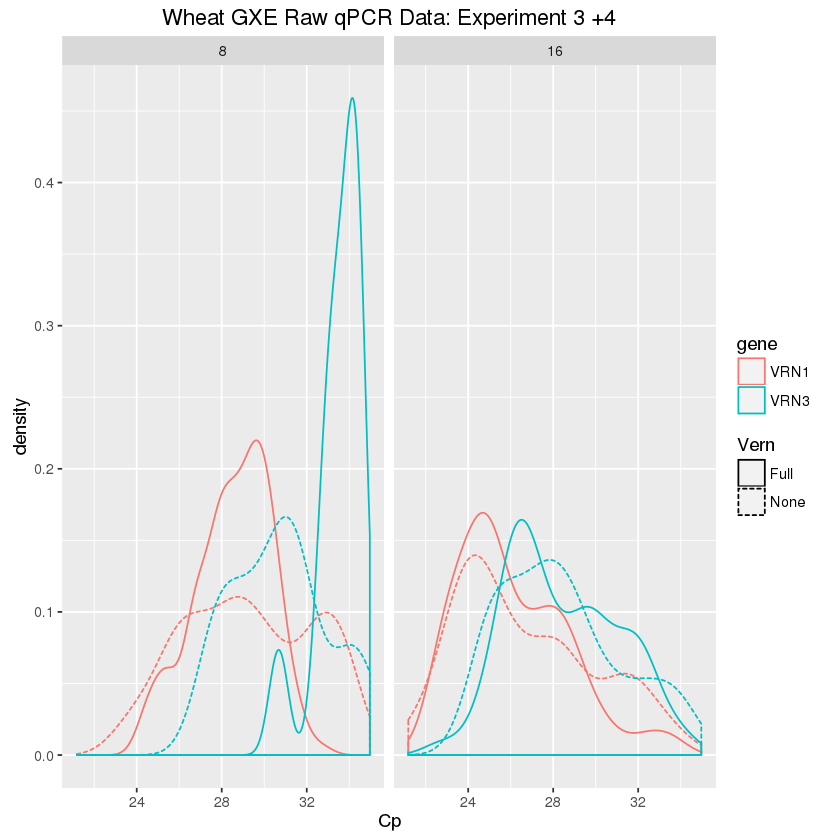

In [80]:
merged %>% 
  filter(is.na(exclude.all)) %>%
    filter((Experiment == 3)|(Experiment == 4)) %>% 
    filter(grepl("VRN1|VRN3",gene)) %>%
    ggplot(aes(x=Cp)) +  geom_density(aes(color=gene,linetype=Vern))  +
    facet_wrap(~ Pp) + ggtitle('Wheat GXE Raw qPCR Data: Experiment 3 +4')

In [81]:
summary(result_dt)

  qPCR_well             Name                 Cp            gene          
 Length:10230       Length:10230       Min.   :19.22   Length:10230      
 Class :character   Class :character   1st Qu.:23.89   Class :character  
 Mode  :character   Mode  :character   Median :26.52   Mode  :character  
                                       Mean   :26.61                     
                                       3rd Qu.:28.82                     
                                       Max.   :34.97                     
                                       NA's   :5437                      
    Plate           sample_well       
 Length:10230       Length:10230      
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
                                      

In [82]:
names(merged)

[1] "Name"            "Plate"           "sample_well"     "SampleDate"     
 [5] "qPCR_well"       "Cp"              "gene"            "Col"            
 [9] "Row"             "Experiment"      "Plot.ID.Old"     "Plot.IDNew"     
[13] "Vern"            "Cult"            "Pp"              "reason"         
[17] "exclude.all"     "exclude.VRN1"    "exclude.VRN2"    "exclude.Vrn3"   
[21] "exclude.EGF1a"   "exclude.Ta54227"

### Write merged sample info and raw Cp Data out in one big  csv, overwriting earlier work

In [84]:
write_csv(merged,'./data/GEP_qPCR_results_merged.csv')